In [17]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9228\1257059984.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [18]:
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

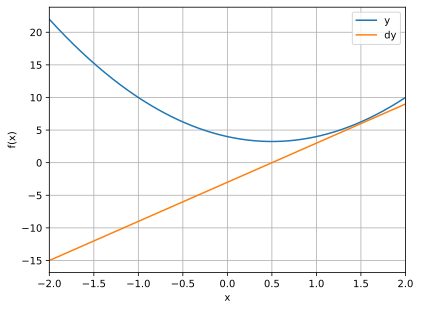

In [19]:
# plot

# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["y", "dy"])
plt.show()

In [20]:
# random starting point
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run thru training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

localmin

array([0.49773553])

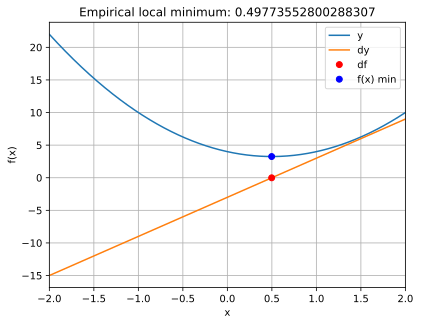

In [21]:
# plot the results

plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), "ro")
plt.plot(localmin, fx(localmin), "bo")

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["y", "dy", "df", "f(x) min"])
plt.title("Empirical local minimum: %s" %localmin[0])
plt.show()

In [22]:
# Random starting point (converted to scalar)
localmin = np.random.choice(x, 1).item()

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Storage for results
modelparams = np.zeros((training_epochs, 2))

# Training loop
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad
    modelparams[i, :] = localmin, grad


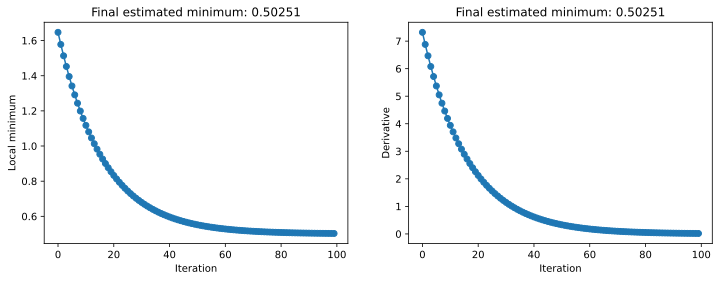

In [23]:
# plot the gradient over iterations

fix, ax = plt.subplots(1, 2, figsize = (12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], "o-")
    ax[i].set_xlabel("Iteration")
    ax[i].set_title(f"Final estimated minimum: {localmin:.5f}")

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")

plt.show()

In [24]:
## GD Using fixed learning rate

# Random starting
localmin = np.random.choice(x, 1)
initval = localmin[:] # store the initial value

# Learning parameters
learning_rate = 0.01
training_epochs = 50

# Storage for results
modelparamsFixed = np.zeros((training_epochs, 3))

# Training loop
for i in range(training_epochs):

    # compute gradient
    grad = deriv(localmin)

    # non-adaptive learning rate
    lr = learning_rate

    # update parameter according to GD
    localmin = localmin - lr * grad

    # store the parameters
    modelparamsFixed[i, :] = localmin.item(), grad.item(), lr

In [25]:
## GD using a gradient based learning rate

# Random starting
localmin = np.random.choice(x, 1)
initval = localmin[:] # store the initial value

# Learning parameters
learning_rate = 0.01
training_epochs = 50

# Storage for results
modelparamsGrad = np.zeros((training_epochs, 3))

# Training loop
for i in range(training_epochs):

    # compute gradient
    grad = deriv(localmin)

    # adaptive learning rate according to the gradient
    lr = learning_rate*np.abs(grad)

    # update parameter according to GD
    localmin = localmin - lr * grad

    # store the parameters
    modelparamsGrad[i, :] = localmin.item(), grad.item(), lr.item()

In [26]:
## GD using a time based learning rate

# Learning parameters
learning_rate = 0.1
localmin = initval

# Storage for results
modelparamsTime = np.zeros((training_epochs, 3))

# Training loop
for i in range(training_epochs):

    # compute gradient
    grad = deriv(localmin)

    # adaptive learning rate according to the gradient
    lr = learning_rate*(1 - (i + 1)/training_epochs)

    # update parameter according to GD
    localmin = localmin - lr * grad

    # store the parameters
    modelparamsTime[i, :] = localmin.item(), grad.item(), lr

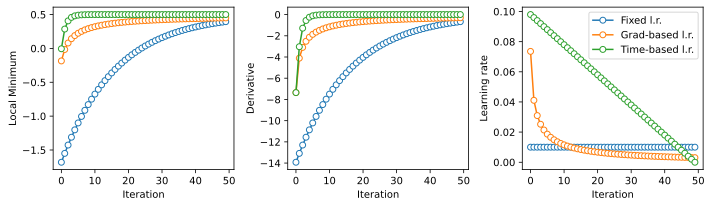

In [27]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3))

# generate the plots
for i in range(3):
    ax[i].plot(modelparamsFixed[:, i], "o-", markerfacecolor = "w")
    ax[i].plot(modelparamsGrad[:, i], "o-", markerfacecolor = "w")
    ax[i].plot(modelparamsTime[:, i], "o-", markerfacecolor = "w")
    ax[i].set_xlabel("Iteration")

ax[0].set_ylabel("Local Minimum")
ax[1].set_ylabel("Derivative")
ax[2].set_ylabel("Learning rate")
ax[2].legend(["Fixed l.r.", "Grad-based l.r.", "Time-based l.r."])

plt.tight_layout()
plt.show()